# Practice Project 1:Scraping and analysis of ageofconsent.net
## December 1st, 2018 By Zion Joseph

### Imports:

In [1]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from datetime import datetime
import matplotlib.pyplot as plt

### Scraping of Data

In [14]:
URL = "https://www.ageofconsent.net/world"
R = requests.get(url = URL)
root = BeautifulSoup(R.content)
table = root.find("tbody")
rows = root.find_all("tr")
data = []

for row in rows:
    col = row.find_all("td")
    col = [ele.text.strip() for ele in col]
    data.append([ele for ele in col if ele])
    
page = pd.DataFrame(data[1:], columns=['Country', 'Region', 'Age'])

#Replace all Must be married values
page2 = page.replace("Must be married", 0)
#Convert to int
for index, row in page2.iterrows():
    row["Age"] = int(row["Age"])
    
#Display Dataframe
page.head()

,Country,Region,Age
0,Afghanistan,Asia,Must be married
1,Albania,Europe,14
2,Algeria,Africa,16
3,American Samoa,Oceania,16
4,Andorra,Europe,16


## Analysis: Graphing the values

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


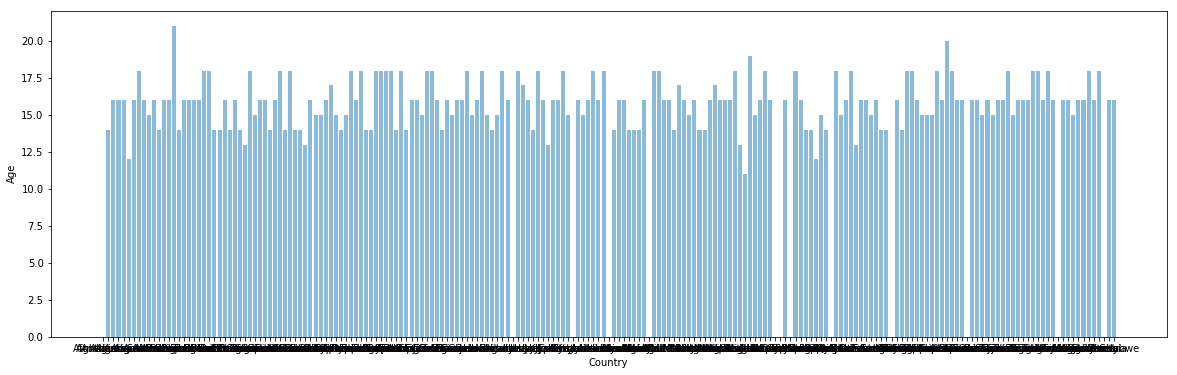

In [20]:
fig = plt.figure(figsize=(20,6))
plt.bar(page2["Country"], page2["Age"], align='center', alpha=0.5)
plt.ylabel('Age')
plt.xlabel('Country')
fig.show()

### There are currently way too many countries, so Instead I will plot based on Region

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


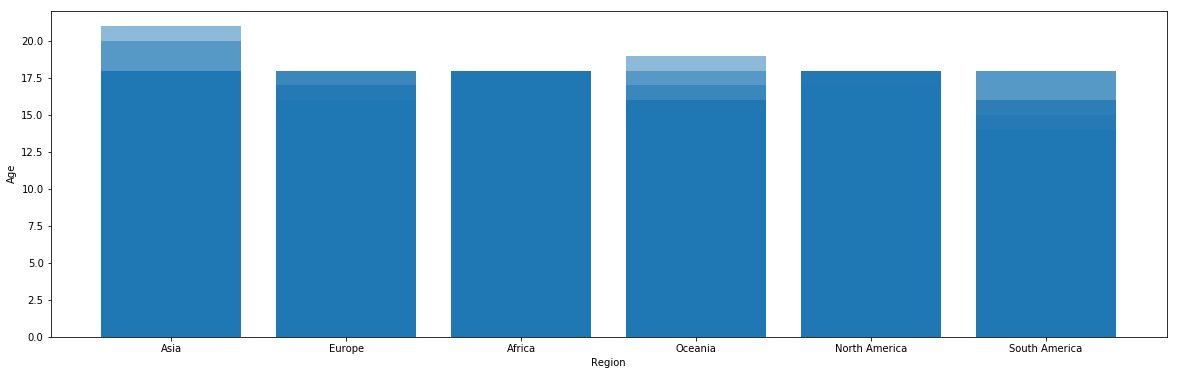

In [25]:
fig2 = plt.figure(figsize=(20,6))
plt.bar(page2["Region"], page2["Age"], align='center', alpha=0.5)
plt.ylabel('Age')
plt.xlabel('Region')
fig2.show()

## This graph is much more readable, and we can see a glimpse of what some of the regions Ages of cosent are. Now I will represent these values in a scatterplot

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


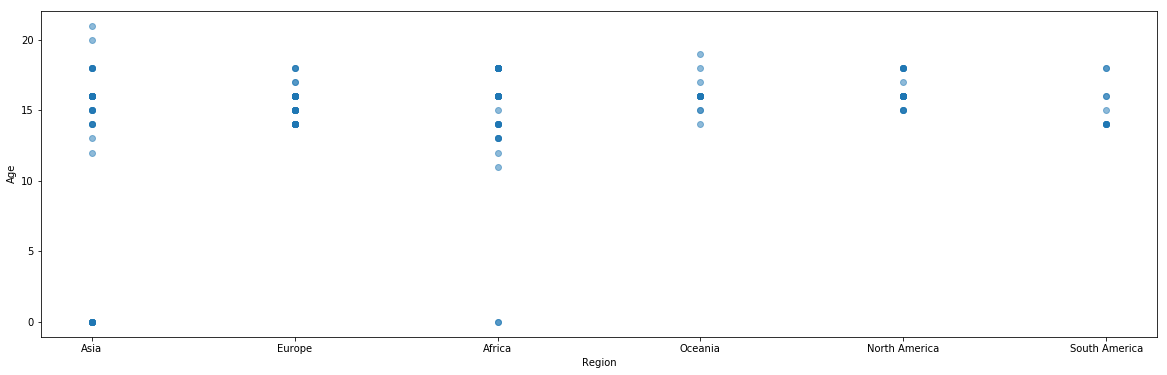

In [27]:
fig3 = plt.figure(figsize=(20,6))
plt.scatter(page2["Region"], page2["Age"], alpha=0.5)
plt.ylabel('Age')
plt.xlabel('Region')
fig3.show()

# Awseome! Through this scatterplot, we can see which Regions have the biggest spread for ages of consent as well as which Regions offer marraige as consent because of their points at 0.

## With a rough look at the data, we can see that both Africa and Asia offers marriage as consent and have the the country with the lowest age of consent. We can also see that Asia has the oldest age of consent as well.